
✅ 总共匹配段落数量: 1967
📏 最大段落词数: 265
📐 最小段落词数: 11


/var/folders/s7/nxp3lgm113d8p35k1dpmmgkw0000gp/T/ipykernel_49469/796962133.py:92: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s7/nxp3lgm113d8p35k1dpmmgkw0000gp/T/ipykernel_49469/796962133.py:92: UserWarning: Glyph 35789 (\N{CJK UNIFIED IDEOGRAPH-8BCD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s7/nxp3lgm113d8p35k1dpmmgkw0000gp/T/ipykernel_49469/796962133.py:92: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s7/nxp3lgm113d8p35k1dpmmgkw0000gp/T/ipykernel_49469/796962133.py:92: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s7/nxp3lgm113d8p35k1dpmmgkw0000gp/T/ipykernel_49469/796962133.py:92: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/s7/nxp3lgm11

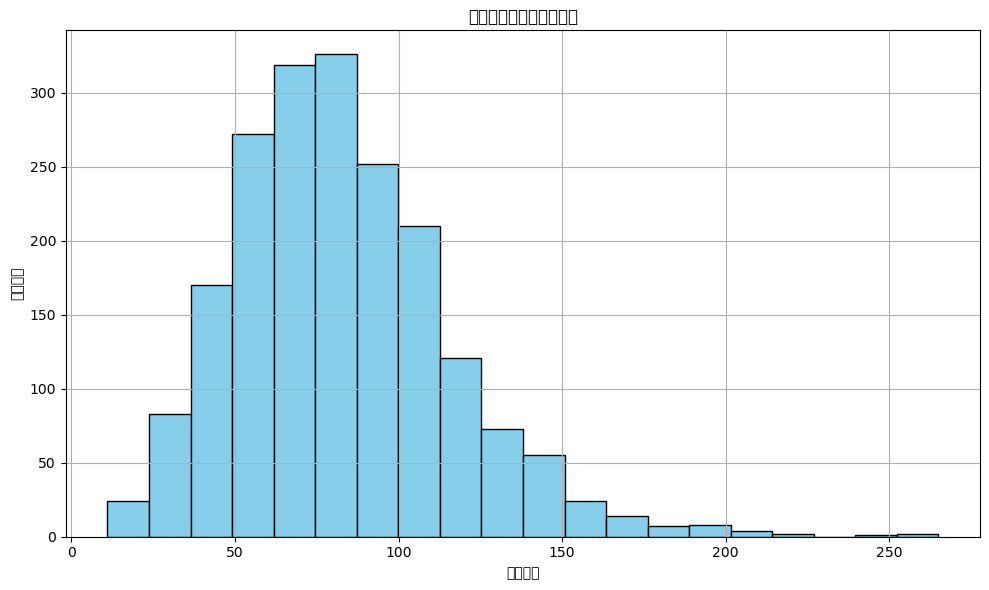

In [3]:
import os
import re
import matplotlib.pyplot as plt

# === 设置关键词 ===
geo_political_terms_with_star = [
    "war", "military", "terror*", "geopolitical", "conflict", "Middle East", "Iraq", "Afghanistan",
    "Iran", "Syria", "Libya", "Ukrain*", "Russia*", "North Korea", "Venezuela", "coup",
    "expropriation", "confiscation", "nationalism", "security", "protest*", "country", "countries",
    "political", "retaliation", "unrest", "geograph*", "troop*", "sanction", "sanctions", "embargo",
    "wars", "warfare", "army", "navy", "weapon*", "combat", "missile*", "immigration", "diplomacy"
]

risk_terms_with_star = [
    "risk*", "uncertain*", "variab*", "chance*", "possib*", "pending", "doubt*", "prospect*",
    "bet", "bets", "betting", "exposed", "likel*", "threat*", "probab*", "unknown*", "potential",
    "concern*", "tension*", "issue*", "instability", "cautio*", "fear*", "volatil*", "varying",
    "unclear", "speculative", "hesitant", "headwind*", "backlog*", "dispute", "disrupt*", "worry*",
    "worries", "hurdle*", "obstacle*", "disturbance*", "hostil*", "unrest", "conflict", "pressure*",
    "crisis", "trigger*", "impact", "peril*", "effect*", "acts", "attack*", "incident*"
]

def compile_patterns(terms):
    return [re.compile(rf"^{re.escape(term).replace(r'\*', '.*')}$", re.IGNORECASE) for term in terms]

geo_patterns = compile_patterns(geo_political_terms_with_star)
risk_patterns = compile_patterns(risk_terms_with_star)

def clean_and_split(text):
    text = re.sub(r'<.*?>', ' ', text)  # Remove HTML
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text.lower().split()

def match_in_window(words, window_size=10):
    for i in range(len(words) - window_size + 1):
        window = words[i:i+window_size]
        has_geo = any(any(p.match(w) for p in geo_patterns) for w in window)
        has_risk = any(any(p.match(w) for p in risk_patterns) for w in window)
        if has_geo and has_risk:
            return True
    return False

# 遍历路径
base_path = "/Users/ui21149/PycharmProjects/rep_measureGPR/WRDS/Proofed Copy/transcripts_2024"
matched_paragraphs = []
seen_paragraphs = set()

count=0
for root, dirs, files in os.walk(base_path):
    if count > 10:
        break
    if os.path.basename(root) == 'headline_with_q_year':
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read()
                    # 按段落拆分（两个或更多换行符）
                    paragraphs = re.split(r'\n+', text)

                    for para in paragraphs:
                        words = clean_and_split(para)
                        if match_in_window(words):
                            para_cleaned = para.strip()
                            if para_cleaned not in seen_paragraphs:
                                seen_paragraphs.add(para_cleaned)
                                word_count = len(words)
                                matched_paragraphs.append((file_path, para_cleaned, word_count))
                                count = count + 1

# 打印结果
word_counts = []

for file_path, para, word_count in matched_paragraphs:
    # print(f"\n--- 文件: {file_path} ---")
    # print(para)
    # print(f"【段落单词数】: {word_count}")
    word_counts.append(word_count)

print(f"\n✅ 总共匹配段落数量: {len(matched_paragraphs)}")
print(f"📏 最大段落词数: {max(word_counts)}")
print(f"📐 最小段落词数: {min(word_counts)}")

# 画直方图
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
plt.title('匹配段落的单词数量分布')
plt.xlabel('单词数量')
plt.ylabel('段落数量')
plt.grid(True)
plt.tight_layout()
plt.show()